# Visualization

Adapted from material by Ani Adhikari, Suraj Rampure, and Fernando Pérez and Josh Hug and Narges Norouzi


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
births = pd.read_csv('data/baby.csv')

In [ ]:
births.head()

In [ ]:
births.shape

# Visualizing Distributions: Qualitative Variables
## Bar Plots

We often use bar plots to display distributions of a categorical variable:

In [ ]:
babies = births['Maternal Smoker'].value_counts()
babies

### Option 1: Plotting bar plots using Pandas Series.plot() method:
https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html

(Behind the scenes this is just using Matplotlib)

In [ ]:
babies.plot(kind='bar');

**Practice:  Check the documentation to see how to make a horizontal bar plot of the distribution of the Maternal Smoker variable:**

In [32]:
...

Ellipsis

### Option 2: Plotting bar plots using Matplotlib:

https://matplotlib.org/

Matplotlib is a foundational library that provides a comprehensive set of tools for creating a wide range of static, interactive, and animated visualizations. It’s highly versatile and can be used to create everything from basic line and bar plots to complex visualizations.

We will typically import it with alias `.plt` 

Pros:

 - Offers extensive customization options for visualizations.
 - Provides fine-grained control over plot aesthetics and styles.
 - Supports a wide variety of plot types and chart configurations.

Cons:

 - Requires writing more code to achieve certain types of visualizations.
 - Has a steeper learning curve due to its granular syntax.

Use Cases:

 - Basic line, bar, and scatter plots.
 - Customizing plot aesthetics and styles.
 - Creating complex visualizations with precise control.

In [ ]:
babies.index

In [ ]:
babies.values

We can plot a bar plot in matplot lib using 


`plt.bar(x, height)`
where x and height are arrays such that the bars are positioned at x with height given by height.  

In [ ]:
import matplotlib.pyplot as plt

plt.bar(babies.index,babies.values);

In [ ]:
# Change labels from boolean (0 and 1) to string (False and True):

plt.bar(babies.index.astype(str),babies.values);


**Practice:  Make a horizontal bar plot of the distribution of the Maternal Smoker variable:**

In [34]:
# Change to a horizontal bar plot:
plt.barh(babies.index.astype(str),babies.values);

NameError: name 'plt' is not defined

### Option 3: Plotting bar plots using Seaborn:

https://seaborn.pydata.org/

Seaborn is built on top of Matplotlib and aims to simplify the creation of informative and attractive statistical graphics. It provides a higher-level interface for creating complex visualizations with ease.

Pros:

 - Offers built-in themes and color palettes for aesthetically pleasing visualizations.
 - Simplifies the creation of advanced statistical plots like box plots and violin plots.
 - Provides support for visualizing multivariate relationships.

Cons:

 - While easier to use than Matplotlib, it may have limitations for highly custom visualizations.

Use Cases:

 - Creating box plots, violin plots, and other advanced statistical plots.
 - Generating heatmaps and correlation matrices.
 - Visualizing multivariate relationships with pair plots.


`countplot` gives a count of each type of qualitative variable

In [ ]:
import seaborn as sns

sns.countplot(data = births, x = 'Maternal Smoker');

In [ ]:
# Change to a horizontal plot:
sns.countplot(y = 'Maternal Smoker',data = births);

### Option 4: Plotting bar plots using Plotly:

https://plotly.com/python/plotly-express/

Plotly focuses on creating interactive and dynamic visualizations that can be embedded in web applications or notebooks. It’s well-suited for creating visually appealing dashboards and interactive data exploration.

Pros:

 - Offers dynamic and interactive visualizations that respond to user input.
 - Supports a wide range of chart types, including 3D plots and geographical maps.
 - Enables the creation of interactive dashboards and web applications.

Cons:

 - May require more resources for rendering due to its interactive nature.
 - Not all features are open source
 - Learning how to effectively use its interactive features might take some time.

Use Cases:

 - Creating interactive line charts, bar charts, and scatter plots.
 - Generating 3D plots and geographical visualizations.
 - Building interactive dashboards for data exploration.


In [ ]:
import plotly.express as px
px.histogram(births, x = 'Maternal Smoker', color = 'Maternal Smoker')

In [ ]:
# Change to a horizontal plot:

px.histogram(births, y = 'Maternal Smoker', color = 'Maternal Smoker')

# Visualizing Distributions:  Quantitative Variables

#### Using built-in Pandas functions:

`df.hist("column")`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html


In [ ]:
births.hist("Maternal Pregnancy Weight");

In [ ]:
births.hist();

#### Using matplotlib

In [ ]:
plt.hist(births["Maternal Pregnancy Weight"]);

### Note about number of bins:
The choice of bins for computing and plotting a histogram can exert substantial influence on the insights that one is able to draw from the visualization. If the bins are too large, they may erase important features. On the other hand, bins that are too small may be dominated by random variability, obscuring the shape of the true underlying distribution. 


**Default bin sizes**:

Matplotlib (and built-in Pandas hist):  10 bins

Seaborn:  Determined using a reference rule that depends on the sample size and variance of the data.  


This works well in many cases, (i.e., with “well-behaved” data) but it fails in others. It is always a good to try different bin sizes to be sure that you are not missing something important. This function allows you to specify bins in several different ways, such as by setting the total number of bins to use, the width of each bin, or the specific locations where the bins should break.

#### Using seaborn

In [ ]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight');

In [ ]:
#Specifying the number of bins)
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', bins=20);

#### Density vs Frequency Histograms

In this class we will usually convert all histograms to a density histogram (so that the total area of the histogram is 1). 

In [ ]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', stat= 'density');

#### Adding a Kernel Density Estimate:
In Seaborn, you can add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:



In [ ]:

sns.histplot(data = births, x = 'Maternal Pregnancy Weight', stat='density', kde = True);


#### Using plotly express:

In [ ]:
px.histogram(births, x = 'Maternal Pregnancy Weight')

**Practice:  Use seaborn to create a **density** histogram showing the distribution of the babies' birth weights (not the maternal pregnancy weight).  
Include the Kernal Density Estimate (KDE) graph on your histogram:**

In [ ]:
...

### Percentiles

In [ ]:
p10= np.percentile(births['Maternal Pregnancy Weight'], 10)


births['category'] = None
births.loc[(births['Maternal Pregnancy Weight'] <= p10), 'category'] = 'Less than the 10th percentile'
births.loc[(births['Maternal Pregnancy Weight'] > p10) , 'category'] = 'Greater than the 10th percentile'

sns.histplot(births, x = 'Maternal Pregnancy Weight', hue = 'category', bins = 35, stat='density');

births.drop(columns = ['category'], inplace = True)

#Mark the 10th percentile on the graph
plt.scatter(p10, -.001, marker='^', color='red', s=400)

print("10th percentile of Maternal Pregnancy Weight is ", p10)

In [ ]:
q1, median, q3 = np.percentile(births['Maternal Pregnancy Weight'], [25, 50, 75])
iqr = q3 - q1

births['category'] = None
births.loc[(births['Maternal Pregnancy Weight'] <= q1) | (births['Maternal Pregnancy Weight'] >= q3), 'category'] = 'Outside of the middle 50%'
births.loc[(births['Maternal Pregnancy Weight'] > q1) & (births['Maternal Pregnancy Weight'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(births, x = 'Maternal Pregnancy Weight', hue = 'category', bins = 35
             , stat = "density");

births.drop(columns = ['category'], inplace = True)


plt.scatter(q1, -.001, marker='^', color='orange', s=400)

plt.scatter(median, -.001, marker='^', color='red', s=400)

plt.scatter(q3, -.001, marker='^', color='green', s=400)

display([q1, median, q3])

## Box Plots

In [ ]:
plt.figure(figsize = (3, 6))
sns.boxplot(data = births, y = 'Maternal Pregnancy Weight');

In [ ]:
bweights = births['Maternal Pregnancy Weight']
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1


q1, q2, q3

**Practice:  Create a boxplot of the distribution of the babies' birth weights**

In [ ]:
...

**Practice:  Calculate the IQR of the babies' birth weights**

In [ ]:
...

## Violin Plots

In [ ]:
plt.figure(figsize = (3, 6))
sns.violinplot(data = births, y = 'Birth Weight');


In [ ]:
#You can put a boxplot inside a violin plot...

px.violin(births, y = "Birth Weight", box=True, width=400)

## Describing Distributions

In [ ]:
median = births['Maternal Pregnancy Weight'].median()
mean = births['Maternal Pregnancy Weight'].mean()

print("Median", median)
print("Mean", mean)

# Visualizing Relationships Between Variables

## Relationships Between 2 Quantitative Variables

## Scatter plots

If both features are quantitative, then we often
examine their relationship with a scatter plot.
Each point in a scatter plot
marks the position of a pair of values for an observation.


With scatter plots, we look for linear and simple nonlinear relationships, and we examine the strength of the relationships.
We also look to see if a transformation of one or the other or both features leads to a linear relationship.

In [ ]:
births.head()

In [ ]:
plt.scatter(births['Maternal Height'], births['Birth Weight']);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

Most `matplotlib` functions also accept a `data=` keyword, and when using this mode, you can then refer to x and y as names of columns in the `data` DataFrame, instead of passing the series explicitly:

In [ ]:
sns.scatterplot(data = births, x = 'Maternal Height', y = 'Birth Weight',hue = 'Maternal Smoker');

In [ ]:
# We can add some "jittering" to the data to help deal with overplotting

sns.stripplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker', jitter = 0.25);

### Hex plots and contour plots

In [ ]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight');

In [ ]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'hex');

In [ ]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'kde', fill = True);

## Relationships Between Two Qualitative Variables

With two qualitative features, we often compare the distribution of one feature
across subgroups defined by the other feature. In effect, we hold one feature constant
and plot the distribution of the other one. To do this, we can use some of the same plots
we used to display the distribution of one qualitative feature, such as a line plot or 
bar plot.
As an example, let's examine the relationship between the suitability of a breed for children and the size of the breed. 

In [ ]:
dogs = pd.read_csv('data/akc.txt')

kids = {1:"high", 2:"medium", 3:"low"}
dogs["kids"] = dogs['children'].map(kids)

dogs

To examine the relationship between these two qualitative features, we calculate three sets of
proportions (one each for low, medium, and high suitability). 
Within each suitability category, we find  the proportion of small, medium, and large dogs. 
These proportions are displayed in the following table. Notice that each column sums to 1 (equivalent to 100\%):

In [ ]:
def proportions(series):
    return series / sum(series)

counts = (dogs.groupby(['kids', 'size'])
 .size()
 .rename('count')
)

prop_table = (counts
 .unstack(level=1)
 .reindex(['high', 'medium', 'low'])
 .apply(proportions, axis=1)
)

prop_table_t= prop_table.transpose()

In [ ]:
prop_table_t

The line plot that follows provides a visualization of these proportions.
There is one "line" (set of connected dots) for each suitability level.
The connected dots give the breakdown of size within a suitability category.
We see that breeds with low suitability for kids are primarily small:

In [ ]:
fig = px.line(prop_table_t, y=prop_table_t.columns, 
        x=prop_table_t.index, line_dash='kids',
        markers=True, width=500, height=250)

fig.update_layout(
    yaxis_title="proportion", xaxis_title="Size",
    legend_title="Suitability <br>for children"
)

We can also present these proportions as a collection of side-by-side bar plots as shown here:

In [ ]:
fig = px.bar(prop_table_t, y=prop_table_t.columns, x=prop_table_t.index,
        barmode='group', width=500, height=250)

fig.update_layout(
    yaxis_title="proportion", xaxis_title="Size", 
    legend_title="Suitability <br>for children"
)

## Relationships Between Mixed Variables

### Overlaid Histograms

In [ ]:
# OPTION 1: Using displot
sns.displot(data = births, x = 'Birth Weight', stat = 'density', hue = 'Maternal Smoker');

In [ ]:
#OPTION 2;  Using Matplotlib

non_smoker = births[births["Maternal Smoker"]==False]

smoker = births[births["Maternal Smoker"]==True]

plt.hist(non_smoker["Birth Weight"], density=True, alpha=0.5);

plt.hist(smoker["Birth Weight"], density=True, alpha =.7);

In [ ]:
sns.displot(data = births, x = 'Birth Weight', kde = True, stat = 'density', hue = 'Maternal Smoker');

In [ ]:
sns.displot(data = births, x = 'Birth Weight', kind = 'kde', hue = 'Maternal Smoker');

### Side-by-side Boxplots and Violinplots

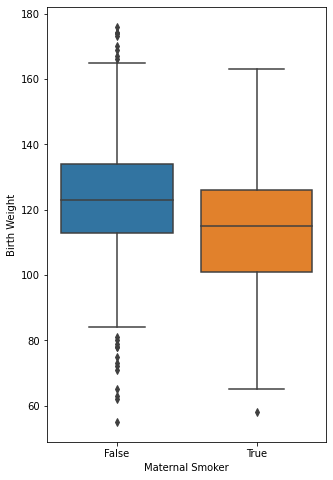

In [17]:
plt.figure(figsize=(5, 8))
sns.boxplot(data = births, x = 'Maternal Smoker', y = 'Birth Weight');

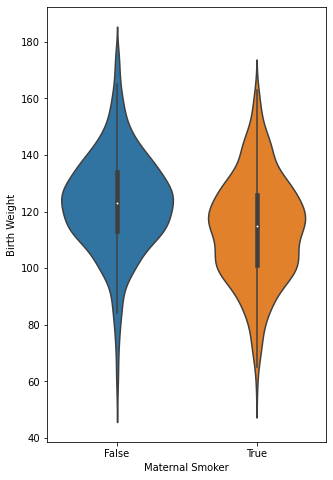

In [19]:
plt.figure(figsize=(5, 8))
sns.violinplot(data = births, x = 'Maternal Smoker', y = 'Birth Weight');

Note the default setting is for the violin plots to smooth the KDE past the observed data points.  If you want to prevent this you can use `cut=0`

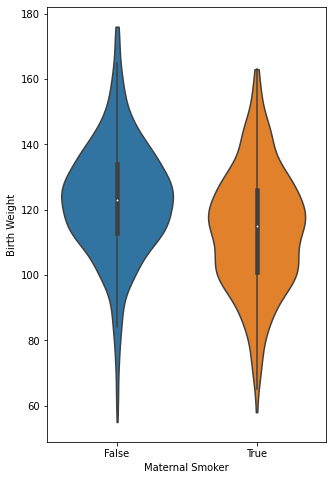

In [21]:
plt.figure(figsize=(5, 8))
sns.violinplot(data = births, x = 'Maternal Smoker', y = 'Birth Weight',cut=0);

## Visualizing More than 2 Variables


Here we summarize the various plotting techniques for making comparisons when we have three (or more) features:

**Two quantitative and one qualitative:** You can use a scatter plot that varies the markers according to the qualitative feature’s categories, or by the panels of scatter plots, with one for each category.



In [ ]:
sns.scatterplot(data = births, x = 'Maternal Height', y = 'Birth Weight', 
           ci = False, hue = 'Maternal Smoker');

In [ ]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker');

In [ ]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'kde', hue = 'Maternal Smoker');

**Two qualitative and one quantitative feature:** We can compare the basic shape of a distribution across subgroups with side-by-side box plots. When we have two or more qualitative features, we can organize the box plots into groups according to one of the qualitative features.

**Three quantitative features:** We can use a similar technique when we plot two quantitative features and one qualitative. This time, we convert one of the quantitative features into an ordinal feature, where each category typically has roughly the same number of records. Then we make faceted scatter plots of the other two features. We again look for similarities in relationships across the facets.

**Three qualitative features:** 
When we examine relationships between qualitative features, we examine proportions of one feature within subgroups defined by another. In the previous section, the three line plots in one figure and the side-by-side bar plots both display such comparisons. With three (or more) qualitative features, we can continue to subdivide the data according to the combinations of levels of the features and compare these proportions using line plots, dot plots, side-by-side bar charts, and so forth. But these plots tend to get increasingly difficult to understand with further subdivisions.